In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

j=pd.read_json('data.json', lines=True)
j.to_csv('data.csv')

<Axes: xlabel='authors', ylabel='Count'>

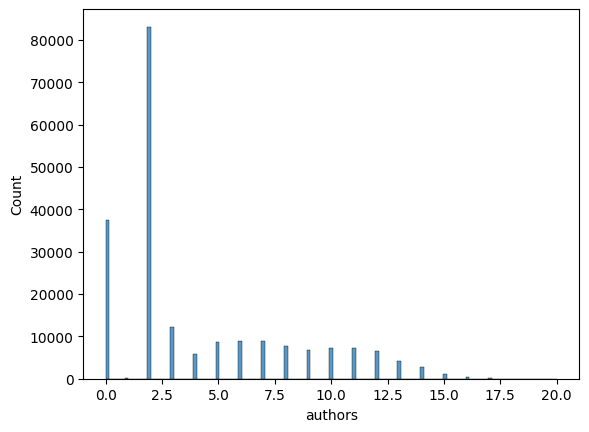

In [3]:
lenghtes = j.authors.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

<Axes: xlabel='headline', ylabel='Count'>

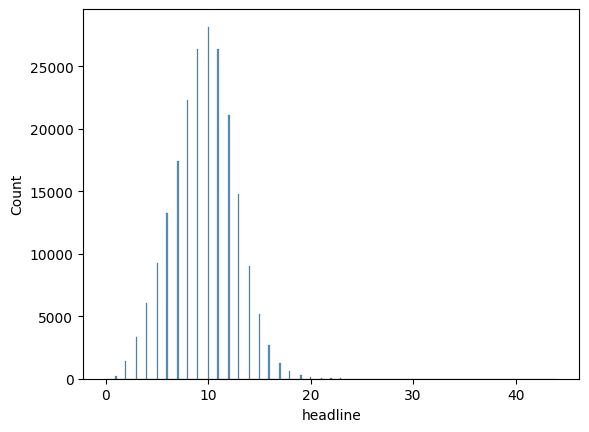

In [4]:
lenghtes = j.headline.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

<Axes: xlabel='short_description', ylabel='Count'>

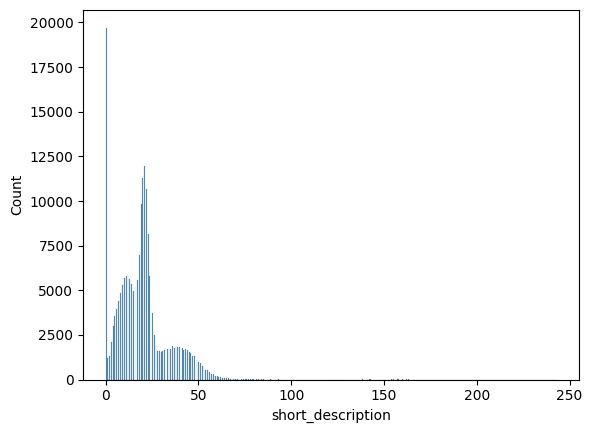

In [5]:
lenghtes = j.short_description.apply(lambda a:a.split()).map(len)
sns.histplot(lenghtes)

In [6]:
from collections import Counter

In [7]:
c  =  Counter(j.category)
print('3 most popular cateories',c.most_common(3), sep='\n')
print('3 least popular cateories',c.most_common()[:-3-1:-1] , sep='\n')

3 most popular cateories
[('POLITICS', 35602), ('WELLNESS', 17945), ('ENTERTAINMENT', 17362)]
3 least popular cateories
[('EDUCATION', 1014), ('CULTURE & ARTS', 1074), ('LATINO VOICES', 1130)]


Text(0.5, 1.0, 'Categories histogram')

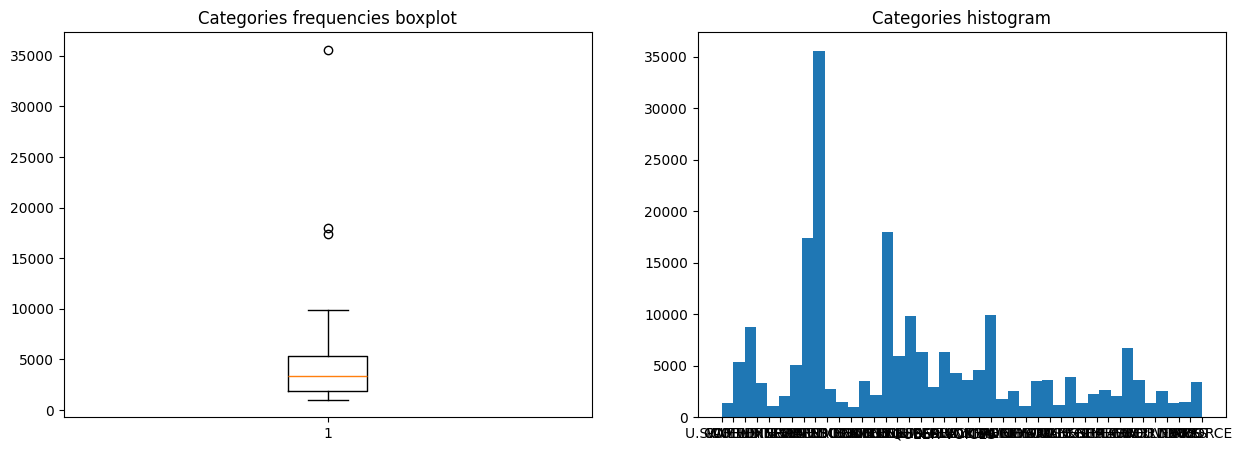

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].boxplot(list(c.values()));
ax[1].hist(j.category, bins=42);
ax[0].set_title('Categories frequencies boxplot')
ax[1].set_title('Categories histogram')

Dataset is imbalanced

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation

In [10]:

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valeriy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/valeriy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import re
from nltk.corpus import stopwords
def clean(row):
    
    row = row.lower()
    row = re.sub('[^a-z A-Z 0-9]+', ' ', row)
    row = " ".join([word for word in row.split() if word not in stopwords.words('english')])
    
    return row

In [12]:
def clean_dataframe(j):
    j['headline'] = j['headline'].apply(clean)
    j['short_description'] = j['short_description'].apply(clean)
    j['link'] = j['link'].apply(clean)
    j ['authors'] = j['authors'].apply(clean)
    return j

In [14]:
data_cleaned = clean_dataframe(j)
data_cleaned.to_csv('data_cleaned.csv', index=False)


In [16]:

data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.isna().sum()


link                     0
headline                67
category                 0
short_description    20179
authors              37419
date                     0
dtype: int64

Nans are here!!!

In [20]:
columns_to_convert = ['headline', 'short_description', 'authors', 'link']
for col in columns_to_convert:
    data_cleaned[col] = data_cleaned[col].astype(str)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:

concat_f = lambda a : ' '.join(a)
grouped = data_cleaned.groupby('category').agg({'headline':concat_f, 'short_description':concat_f, 'authors':concat_f, 'link':concat_f}).reset_index()

In [28]:
def freq_ngrams(data, ngram_range=(1,1), column=''):
    cv = CountVectorizer(ngram_range=ngram_range)
    X = cv.fit_transform(data[column])
    count_values = X.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]

    return ngram_freq
    

<Axes: xlabel='frequency', ylabel='ngram'>

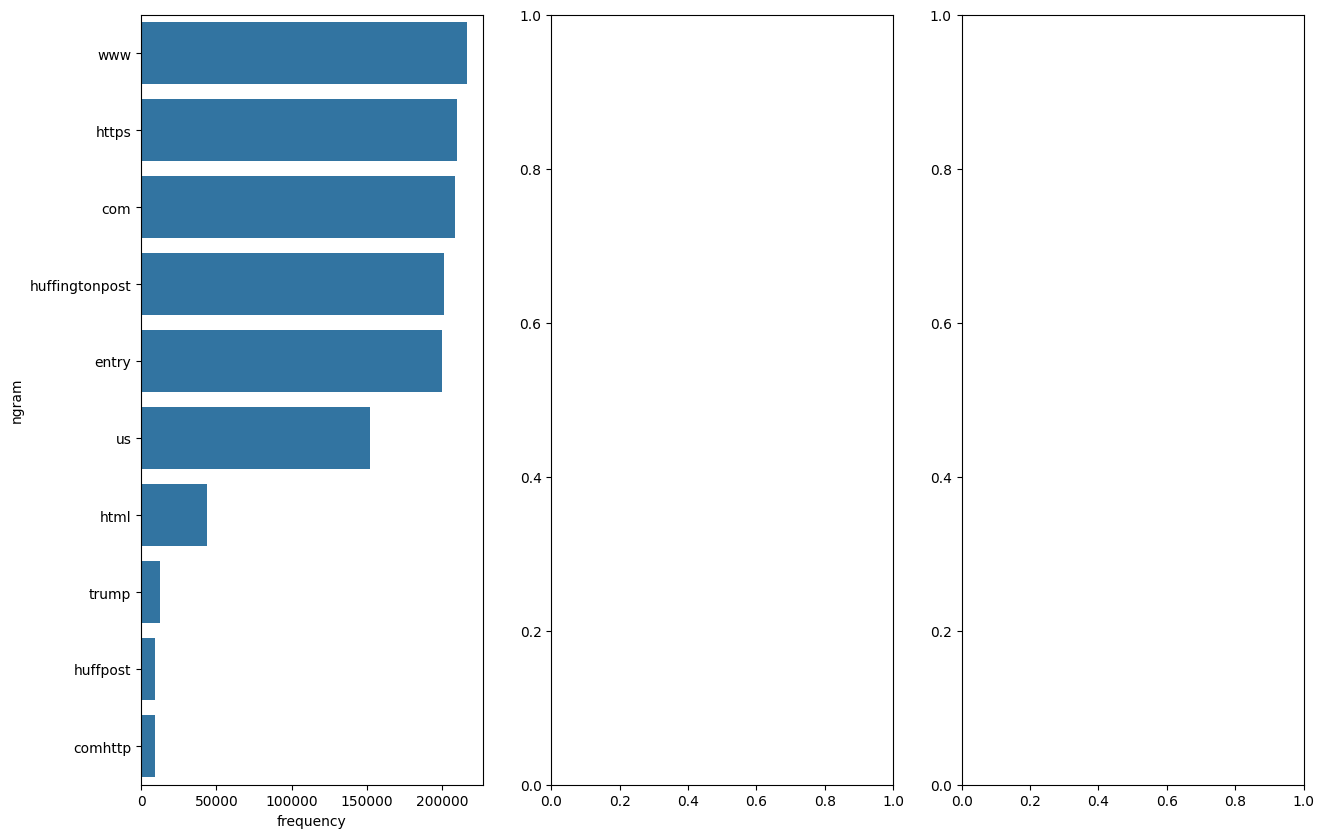

In [29]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='link')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

We can see which words are useless in link

<Axes: xlabel='frequency', ylabel='ngram'>

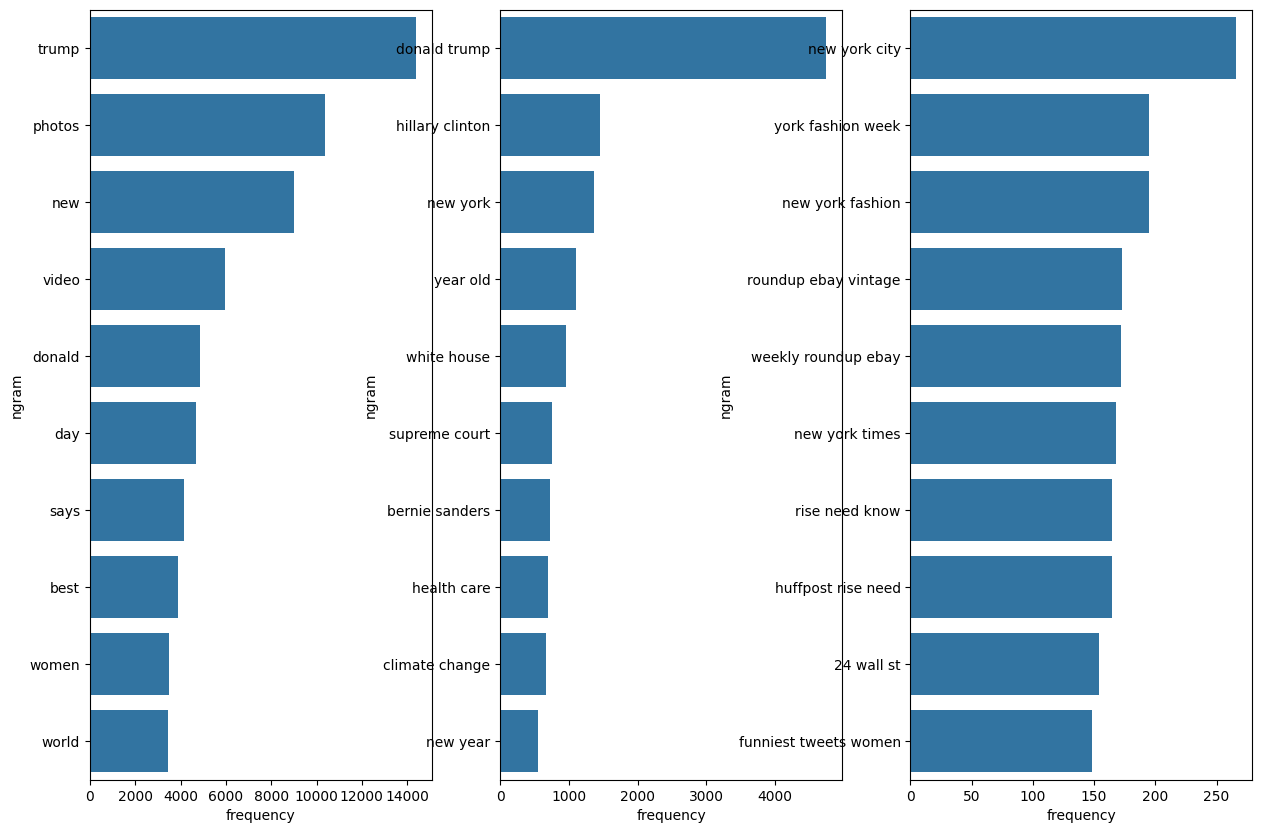

In [30]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='headline')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

<Axes: xlabel='frequency', ylabel='ngram'>

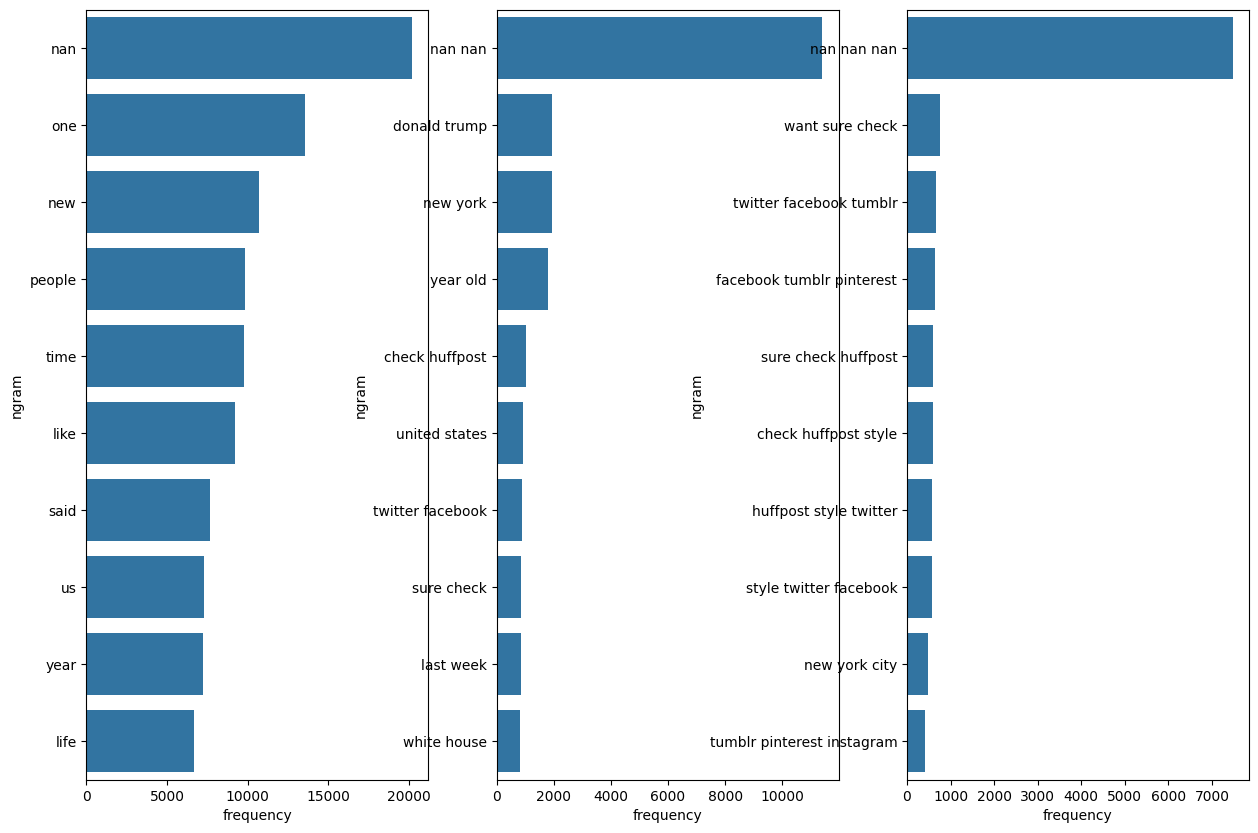

In [31]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='short_description')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

<Axes: xlabel='frequency', ylabel='ngram'>

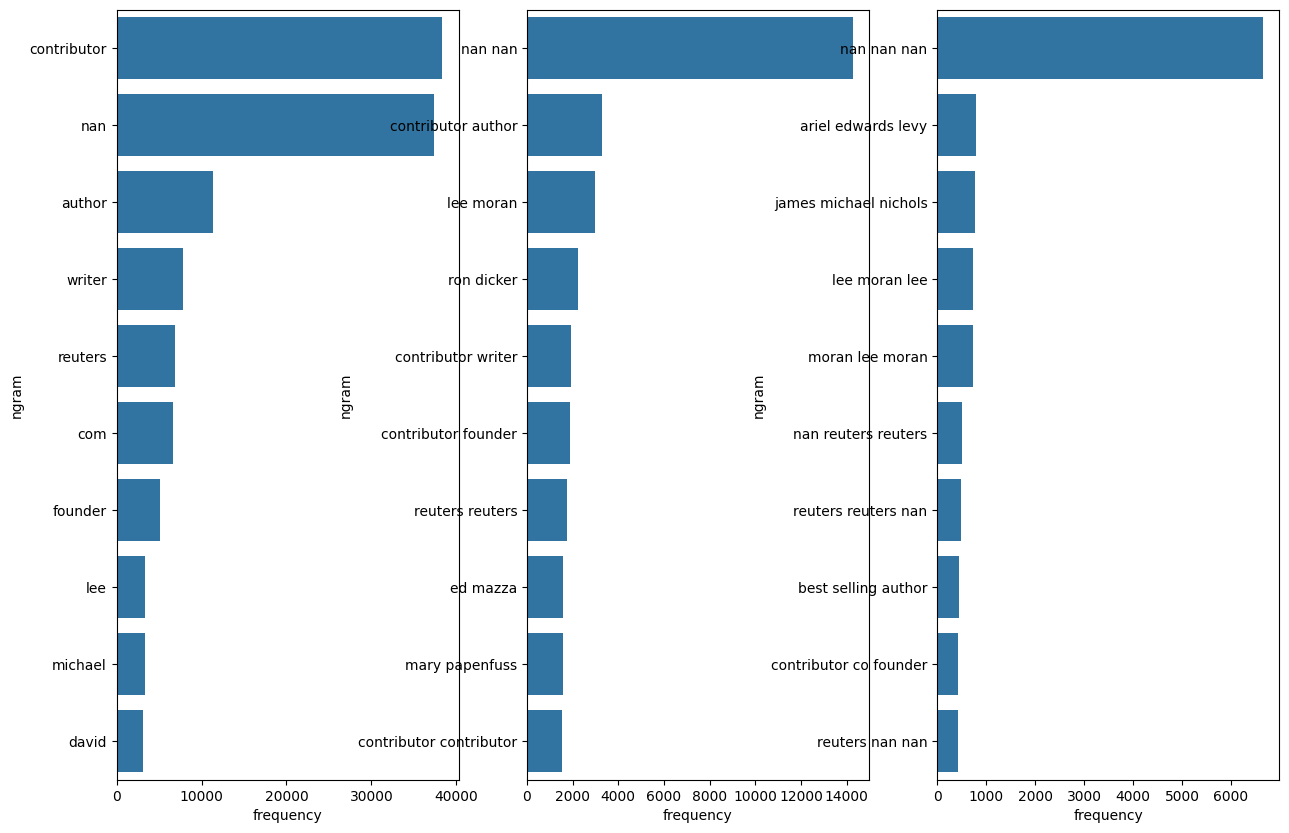

In [32]:
fig, ax = plt.subplots(1,3, figsize=(15,10))
ngram_freq = freq_ngrams(grouped, (1,1),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[0])

ngram_freq = freq_ngrams(grouped, (2,2),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[1])

ngram_freq = freq_ngrams(grouped, (3,3),column='authors')
top_k = 10
sns.barplot(x=ngram_freq['frequency'][:top_k], y=ngram_freq['ngram'][:top_k], ax=ax[2])

In [33]:
stats = pd.DataFrame(grouped.category)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
def find_most_similar_by_column(column):
    cv = TfidfVectorizer ()
    X = cv.fit_transform(grouped[column])

    class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

    feature_names = cv.get_feature_names_out()

    words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  
    

    similarity_matrix = cosine_similarity(X)

    np.fill_diagonal(similarity_matrix, 0)

    most_similar = []

    for i in range(len(similarity_matrix)):
        most_similar.append(class_vocab[similarity_matrix[i].argmax()])

    return most_similar

In [36]:
stats['most_similar_link'] = find_most_similar_by_column('link')
stats['most_similar_headline'] = find_most_similar_by_column('headline')
stats['most_similar_short_description'] = find_most_similar_by_column('short_description')
stats['most_similar_authors'] = find_most_similar_by_column('authors')


In [37]:
def most_common_ngram(data, ngram_range=(1,1), column=''):
    cv = CountVectorizer(ngram_range=ngram_range)
    X = cv.fit_transform(data[column])
    names=cv.get_feature_names_out()
    most_common = X.argmax(axis=1)
    words = [names[idx][0][0] for idx in most_common]

    return words
    

In [38]:
stats['most_common_unigrams_headline'] = most_common_ngram(grouped, ngram_range=(1,1),column='headline')
stats['most_common_bigrams_headline'] = most_common_ngram(grouped, ngram_range=(2,2),column='headline')
stats['most_common_trigrams_headline'] = most_common_ngram(grouped, ngram_range=(3,3),column='headline')

In [39]:
stats['most_common_unigrams_description'] = most_common_ngram(grouped, ngram_range=(1,1),column='short_description')
stats['most_common_bigrams_description'] = most_common_ngram(grouped, ngram_range=(2,2),column='short_description')
stats['most_common_trigrams_description'] = most_common_ngram(grouped, ngram_range=(3,3),column='short_description')

In [40]:
stats['most_common_unigrams_authors'] = most_common_ngram(grouped, ngram_range=(1,1),column='authors')
stats['most_common_bigrams_authors'] = most_common_ngram(grouped, ngram_range=(2,2),column='authors')
stats['most_common_trigrams_authors'] = most_common_ngram(grouped, ngram_range=(3,3),column='authors')

In [41]:
def select_stats_by_columns(column):
    return stats[['category',*[col for col in stats.columns if column in col]]]

In [42]:
select_stats_by_columns('authors')

,category,most_similar_authors,most_common_unigrams_authors,most_common_bigrams_authors,most_common_trigrams_authors
0,ARTS,ARTS & CULTURE,frank,priscilla frank,based arts critic
1,ARTS & CULTURE,ARTS,frank,priscilla frank,frank priscilla frank
2,BLACK VOICES,CRIME,nan,nan nan,nan nan nan
3,BUSINESS,ENVIRONMENT,nan,reuters reuters,communications professional founder
4,COLLEGE,GREEN,tyler,tyler kingkade,kingkade tyler kingkade
5,COMEDY,WEIRD NEWS,andy,andy mcdonald,lee moran lee
6,CRIME,THE WORLDPOST,nan,nan nan,nan nan nan
7,CULTURE & ARTS,PARENTING,contributor,nan nan,based arts critic
8,DIVORCE,WEDDINGS,nan,nan nan,nan nan nan
9,EDUCATION,IMPACT,education,school teacher,peter greene contributorteacher


Here we can see which categories are similar according to different columns
Also we can see the most common n-grams inside each category


Number of words in headline + short_description,  88011


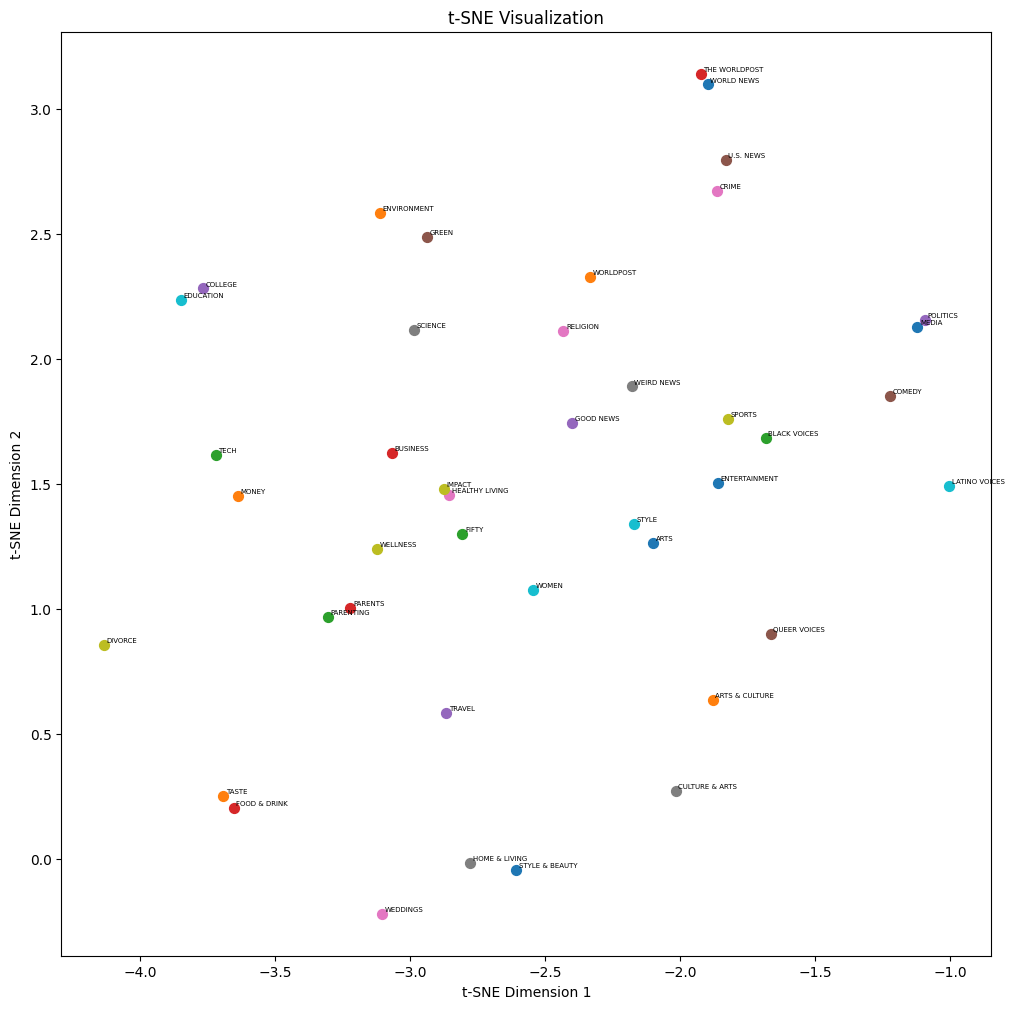

In [43]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['headline']+ ' ' + grouped['short_description'])
print('Number of words in headline + short_description, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE()

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


Number of authors,  32889


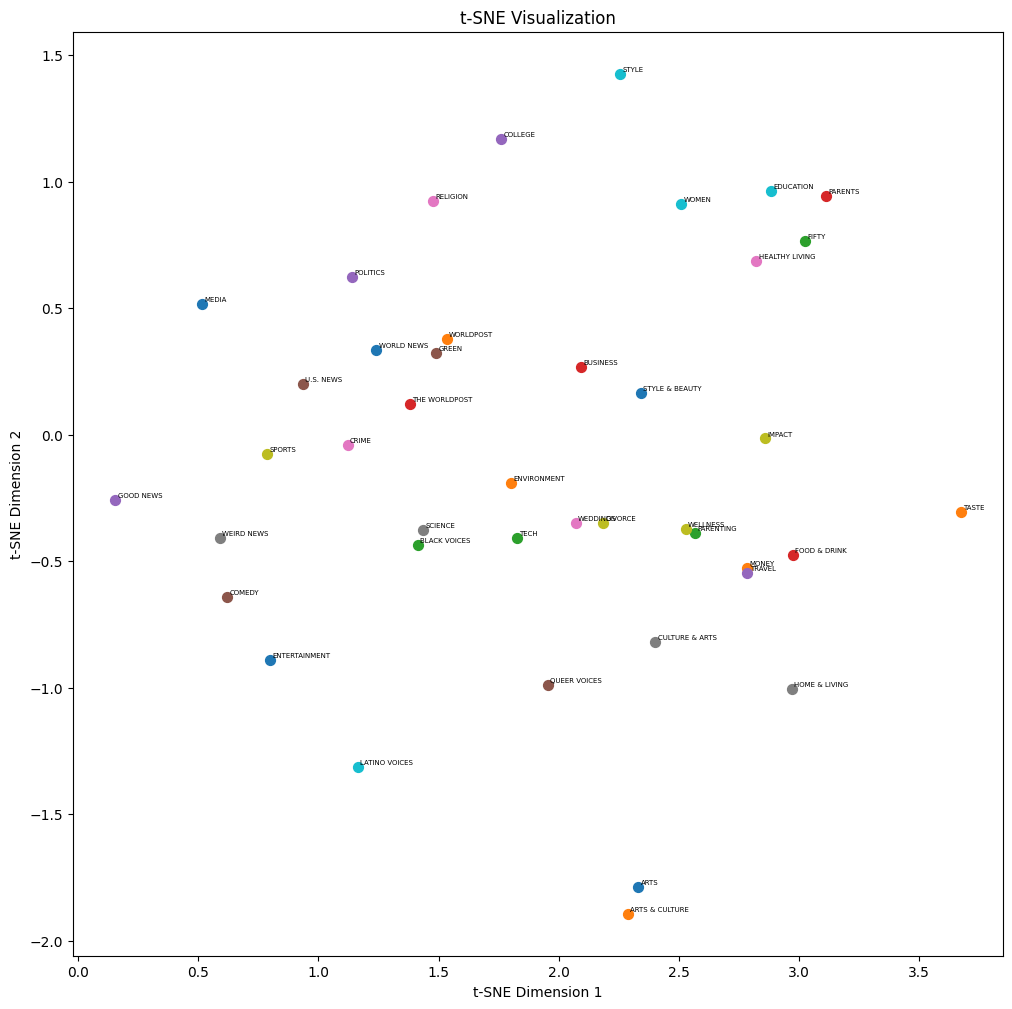

In [44]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['authors'])
print('Number of authors, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE()

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


Number of words in links,  266673


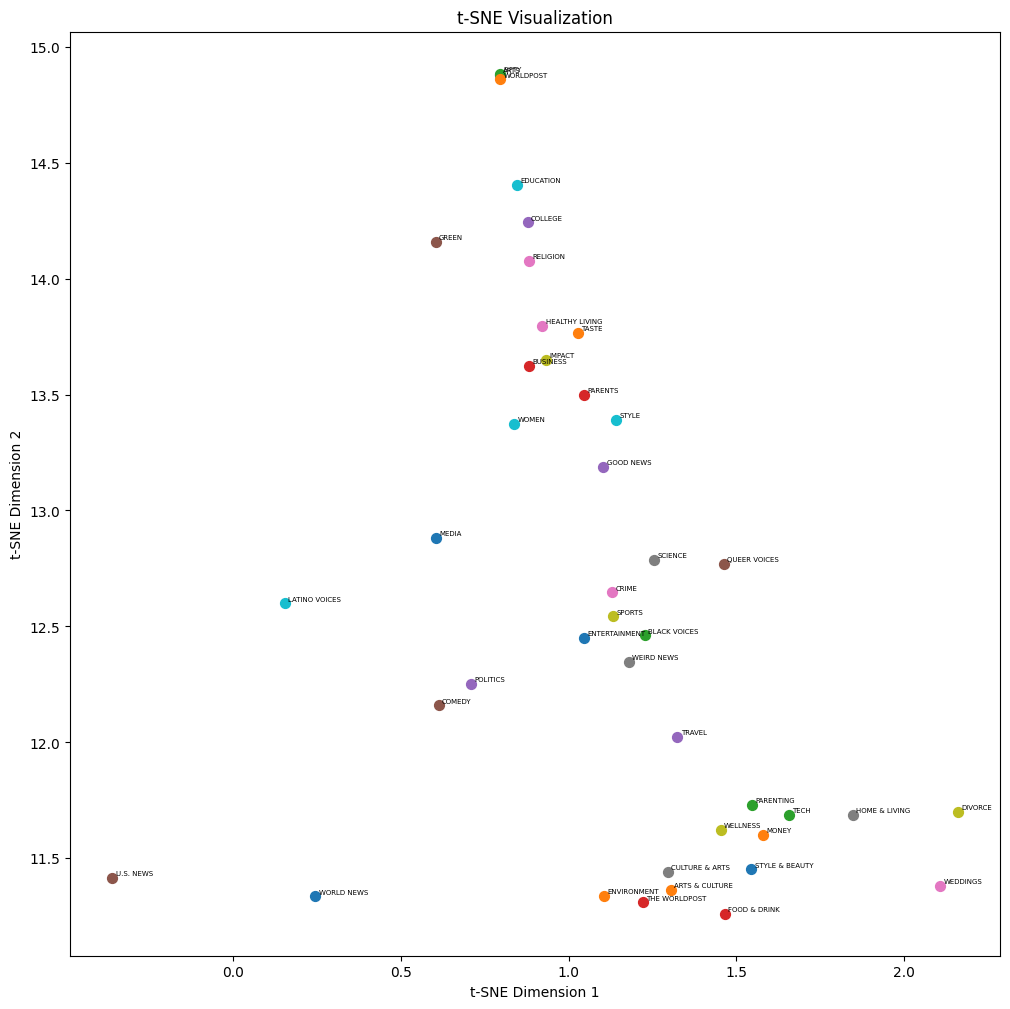

In [45]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['link'])
print('Number of words in links, ',X.shape[1])
class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE(perplexity=30)

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


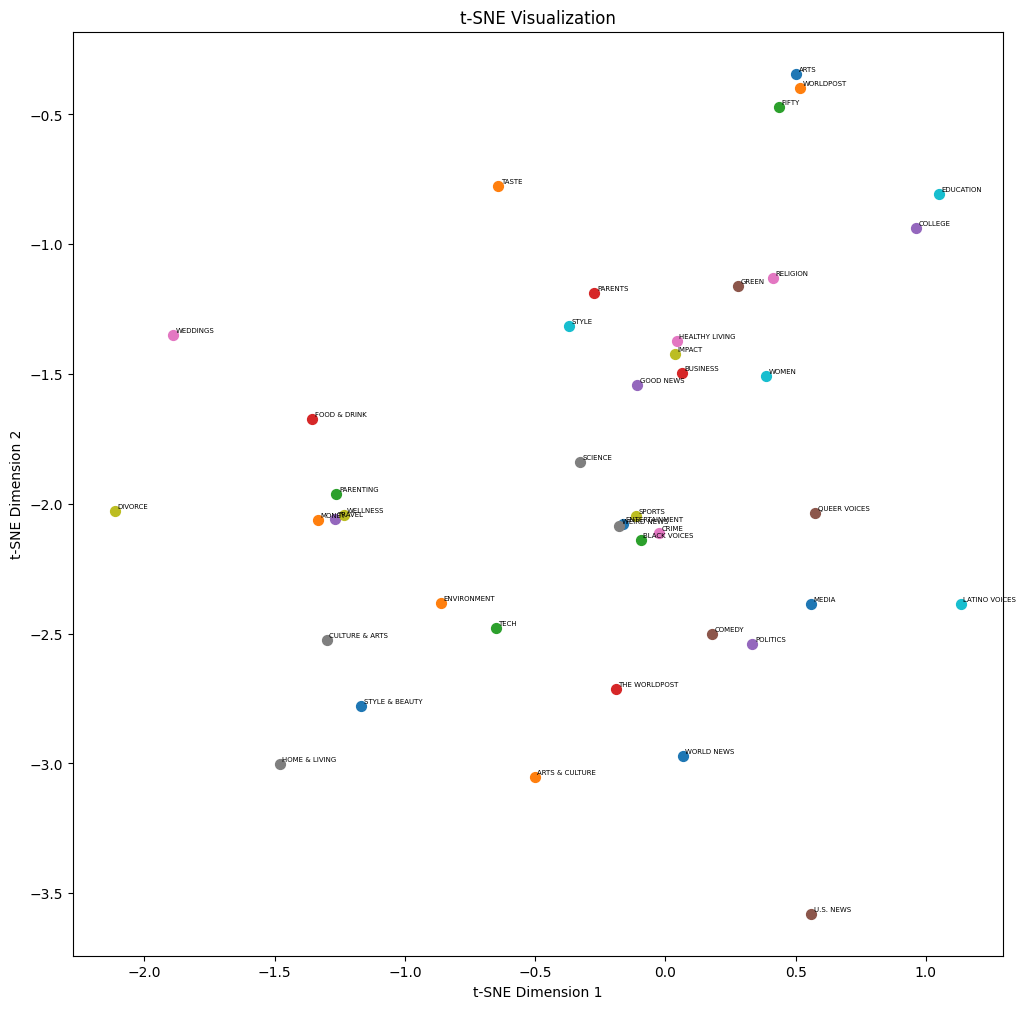

In [46]:
from sklearn.manifold import TSNE
cv = TfidfVectorizer ()
X = cv.fit_transform(grouped['headline']+ ' ' + grouped['short_description']+ ' ' + grouped['authors']+' ' + grouped['link'])

class_vocab = {i: grouped.category[i] for i in range(len(grouped))}

feature_names = cv.get_feature_names_out()

words_vocab = {i: feature_names[i] for i in range(X.shape[1])}  


X = X.toarray()

tsne = TSNE(perplexity=30)

clusters = tsne.fit_transform(X)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot points with labels near each point
for class_idx, class_lab in enumerate(class_vocab.values()):
    x, y = clusters[class_idx, 0], clusters[class_idx, 1]
    ax.scatter(x, y, s=50)  # Plot the point
    ax.text(x + 0.01, y + 0.01, class_lab, fontsize=5)  # Annotate with the class label

# Customize the plot
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization")
plt.show()


Plots above are attemps to visualize similar topics

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
def freq_ngrams_by_category(data, ngram_range=(1, 1), text_column='', category_column='', k=10):
    """
    Finds the k most common n-grams for each category in the dataset.

    Args:
        data (pd.DataFrame): Input data containing text and category columns.
        ngram_range (tuple): Range of n-grams (e.g., (1, 1) for unigrams, (2, 2) for bigrams).
        text_column (str): Name of the column containing text data.
        category_column (str): Name of the column containing category labels.
        k (int): Number of most common n-grams to return for each category.

    Returns:
        pd.DataFrame: DataFrame with the most common n-grams and their frequencies for each category.
    """
    

    # Initialize an empty list to hold results
    results = []

    # Loop through each category
    for category in data[category_column].unique():
        # Filter data for the current category
        category_data = data[data[category_column] == category]
        
        # Use CountVectorizer to extract n-grams
        cv = CountVectorizer(ngram_range=ngram_range)
        X = cv.fit_transform(category_data[text_column])
        
        # Compute n-gram frequencies
        count_values = X.toarray().sum(axis=0)
        ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
        ngram_freq.columns = ["frequency", "ngram"]
        
        # Get the top k n-grams for the category
        top_k = ngram_freq.head(k)
        top_k.loc[:,'category'] = category  # Add category information
        
        # Append results
        results.append(top_k)

    # Concatenate results for all categories
    final_result = pd.concat(results, ignore_index=True)
    
    return final_result


In [107]:
reses_authors = freq_ngrams_by_category(grouped,ngram_range=(1,1), text_column='authors', category_column='category')
def prepare_coolumn(column):

    col  = reses_authors[reses_authors.category==column].reset_index(drop=True).drop('category',axis=1)
    col.columns = col.columns+' '+column
    return col

ARTS  = prepare_coolumn('ARTS')
WORLDPOST  = prepare_coolumn('WORLDPOST')
CRIME =  prepare_coolumn('CRIME')#'ARTS & CULTURE'
ARTS_N_CULTURE = prepare_coolumn('ARTS & CULTURE')
WORLD_NEWS = prepare_coolumn('WORLD NEWS')
MONEY = prepare_coolumn('MONEY')
pd.concat((ARTS,
          WORLDPOST,
          CRIME,
          ARTS_N_CULTURE,
          WORLD_NEWS,

          MONEY),axis=1)

/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_k.loc[:,'category'] = category  # Add category information
/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_k.loc[:,'category'] = category  # Add category information
/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,frequency ARTS,ngram ARTS,frequency WORLDPOST,ngram WORLDPOST,frequency CRIME,ngram CRIME,frequency ARTS & CULTURE,ngram ARTS & CULTURE,frequency WORLD NEWS,ngram WORLD NEWS,frequency MONEY,ngram MONEY
0,234,frank,774,nan,977,nan,316,frank,619,nan,863,contributor
1,221,priscilla,155,author,269,david,315,priscilla,506,reuters,216,nan
2,204,critic,129,policy,260,nina,207,maddie,343,ap,179,com
3,132,art,100,director,260,golgowski,207,crum,187,nick,171,author
4,119,based,98,international,235,reuters,163,fallon,159,conversation,162,reuters
5,111,arts,98,contributorsenior,159,lohr,163,claire,131,mosbergen,145,credit
6,110,contributorwriter,95,fellow,151,michael,134,brooks,131,dominique,142,new
7,108,katherine,92,affairs,128,sebastian,133,katherine,127,cook,136,expert
8,107,brooks,83,writer,128,murdock,44,jillian,125,jesselyn,118,catherine
9,106,writer,83,contributorauthor,128,mclaughlin,44,capewell,116,willa,100,founder


We can see that there are different most popular words in different categories among authors and distribution is non-uniform

In [109]:
grouped_link=grouped
grouped_link.link=grouped_link.link.str.lower().replace(r'\b(www|http|https|com|html)\b',' ', regex=True)
reses_link = freq_ngrams_by_category(grouped_link,ngram_range=(1,1), text_column='link', category_column='category')
def prepare_coolumn(column):

    col  = reses_link[reses_authors.category==column].reset_index(drop=True).drop('category',axis=1)
    col.columns = col.columns+' '+column
    return col

ARTS  = prepare_coolumn('ARTS')
WORLDPOST  = prepare_coolumn('WORLDPOST')
CRIME =  prepare_coolumn('CRIME')#'ARTS & CULTURE'
ARTS_N_CULTURE = prepare_coolumn('ARTS & CULTURE')
WORLD_NEWS = prepare_coolumn('WORLD NEWS')
MONEY = prepare_coolumn('MONEY')
pd.concat((ARTS,
          WORLDPOST,
          CRIME,
          ARTS_N_CULTURE,
          WORLD_NEWS,
          MONEY),axis=1)

/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_k.loc[:,'category'] = category  # Add category information
/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_k.loc[:,'category'] = category  # Add category information
/tmp/ipykernel_197196/557361896.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,frequency ARTS,ngram ARTS,frequency WORLDPOST,ngram WORLDPOST,frequency CRIME,ngram CRIME,frequency ARTS & CULTURE,ngram ARTS & CULTURE,frequency WORLD NEWS,ngram WORLD NEWS,frequency MONEY,ngram MONEY
0,1509,huffingtonpost,2581,huffingtonpost,3469,entry,1339,huffingtonpost,3302,entry,1707,huffingtonpost
1,1509,entry,2579,entry,3408,huffingtonpost,1336,us,2335,us,1635,entry
2,110,art,116,isis,2469,us,1325,entry,2180,huffingtonpost,1605,us
3,50,first,73,us,308,shooting,138,art,1122,huffpost,141,2012
4,45,nighter,64,ukraine,229,police,86,trump,227,korea,130,money
5,31,new,63,iran,176,man,85,book,201,trump,121,comhttp
6,28,stage,62,israel,158,huffpost,60,new,200,north,100,credit
7,24,door,57,war,108,killed,44,women,115,russia,93,tax
8,20,photos,56,greece,104,murder,40,artist,108,china,68,financial
9,16,street,55,photos,102,arrested,35,photos,105,attack,57,debt


We can see that there are different most popular words in different categories among links and distribution is non-uniform